In [1]:
import os
import gc
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages

from boltzmann_machine import BoltzmannMachine

from utils import (plot_sigmoid,
                   get_encprob_env_states, 
                   get_encprob_weight_mask, 
                   gen_free_state_dist_pdf, 
                   gen_clamped_state_dist_pdf, 
                   gen_learning_plots_pdf,
                   get_boltzmann_distribution,
                   get_probs_from_counts,
                   plot_series,
                   generate_binary_vectors,
                   get_clamped_run_scores,
                   get_free_run_scores)

grp_size = 8
num_hnodes = 3
env_states = get_encprob_env_states(grp_size)
weight_mask = get_encprob_weight_mask(grp_size, num_hnodes) 

In [2]:
from glob import glob

In [6]:
runs_dir = './838_saved_runs/'
folder_prefix = 'xxx_30'

In [7]:
selected_folderPaths = glob(f'{runs_dir}/{folder_prefix}*')[:]
selected_folderPaths

['./838_saved_runs\\xxx_30',
 './838_saved_runs\\xxx_30_1',
 './838_saved_runs\\xxx_30_10',
 './838_saved_runs\\xxx_30_11',
 './838_saved_runs\\xxx_30_13',
 './838_saved_runs\\xxx_30_14',
 './838_saved_runs\\xxx_30_2',
 './838_saved_runs\\xxx_30_3',
 './838_saved_runs\\xxx_30_4',
 './838_saved_runs\\xxx_30_5',
 './838_saved_runs\\xxx_30_6',
 './838_saved_runs\\xxx_30_7',
 './838_saved_runs\\xxx_30_8',
 './838_saved_runs\\xxx_30_9']

#0  2000 -86.0 42.0 True


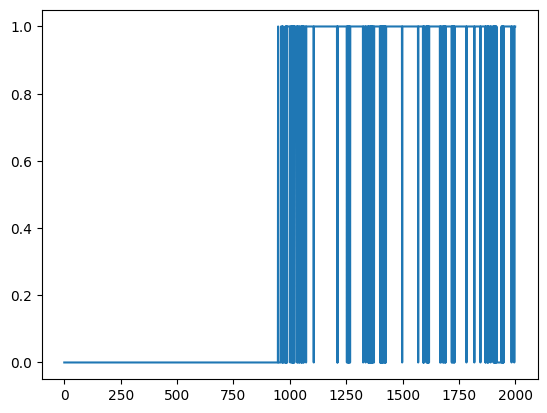

#1  2000 -74.0 46.0 True


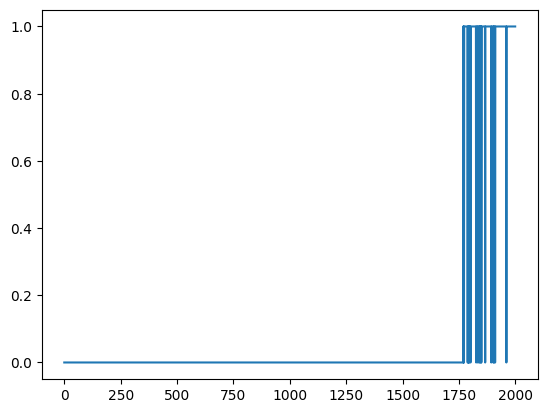

#2  2000 -74.0 46.0 True


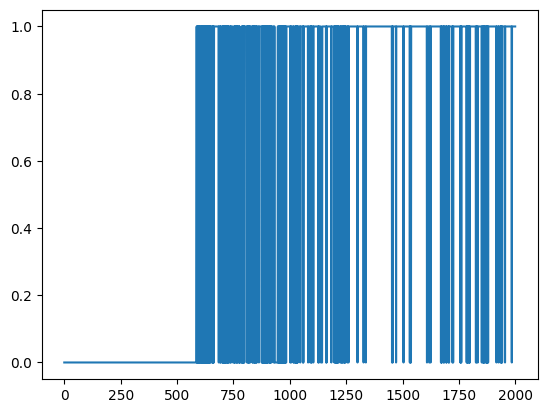

#3  4000 -78.0 46.0 True


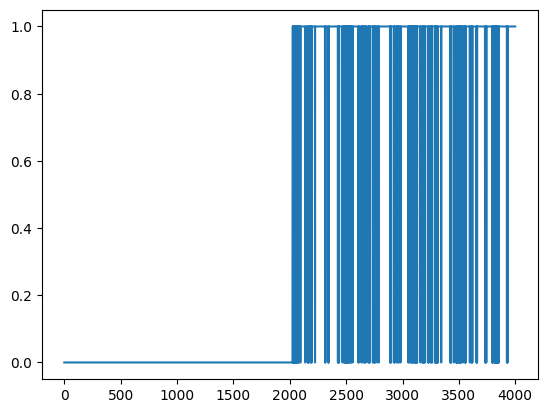

#4  4000 -90.0 46.0 True


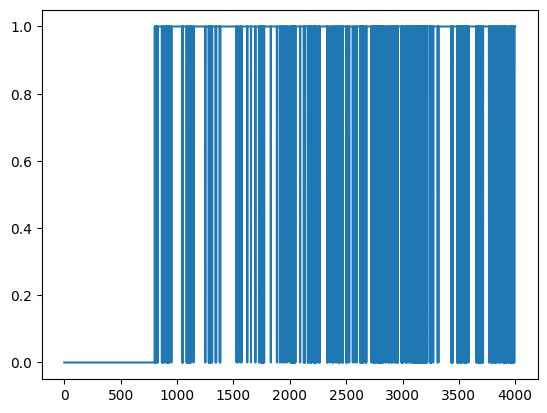

#5  4000 -86.0 48.0 False


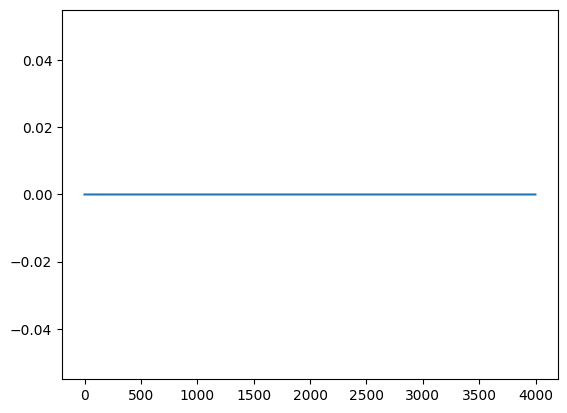

#6  3262 -144.0 128.0 False


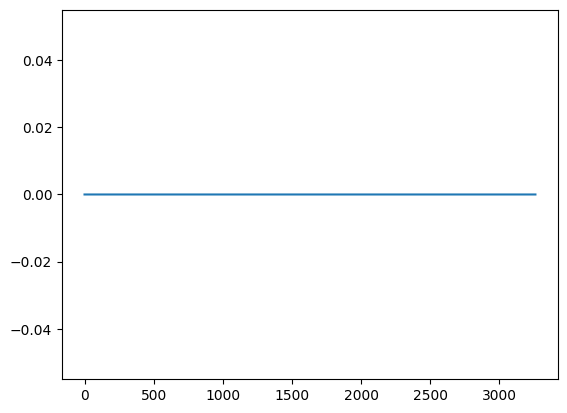

#7  2783 -78.0 46.0 True


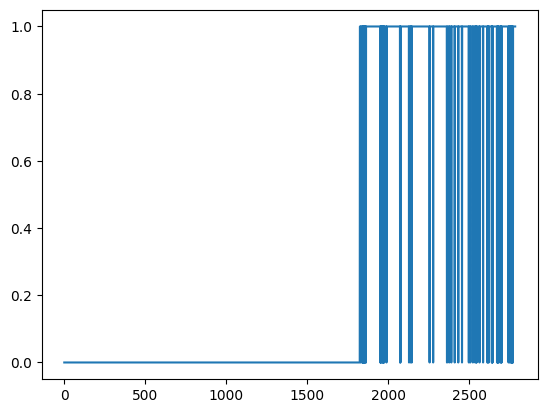

#8  4000 -86.0 46.0 False


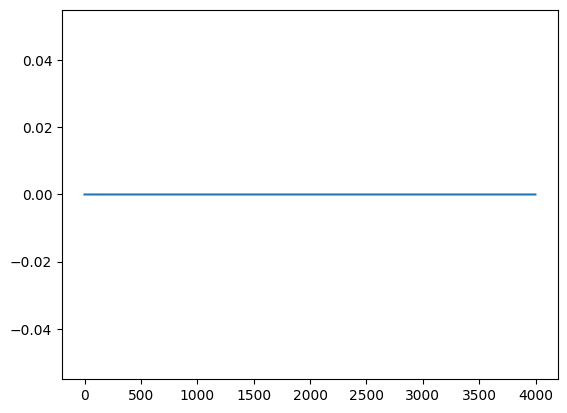

#9  3000 -140.0 112.0 False


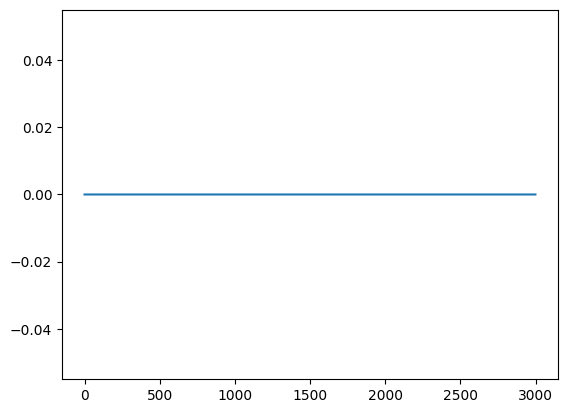

#10  4000 -94.0 46.0 False


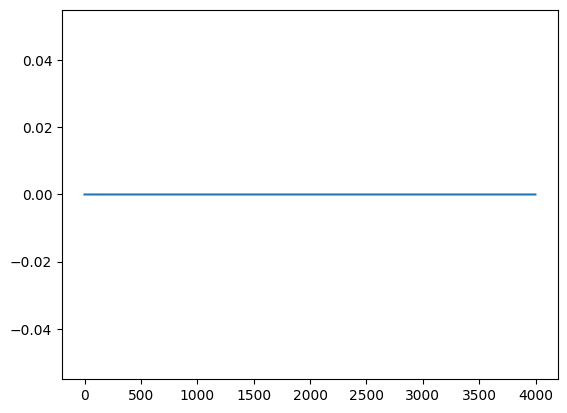

#11  2000 -78.0 46.0 True


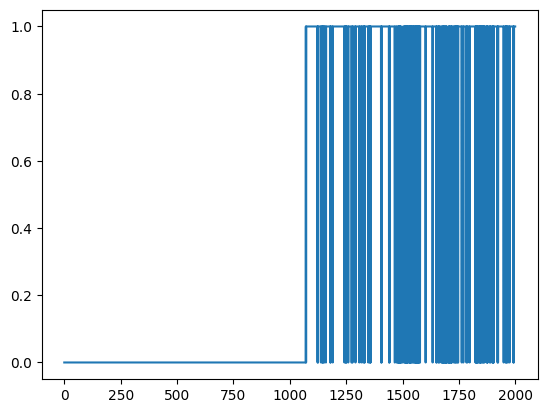

#12  3000 -172.0 136.0 True


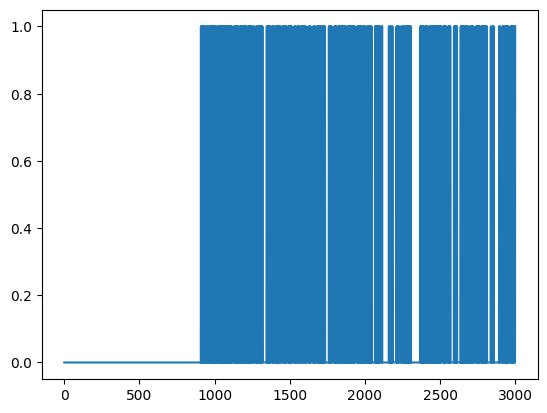

#13  2000 -90.0 42.0 True


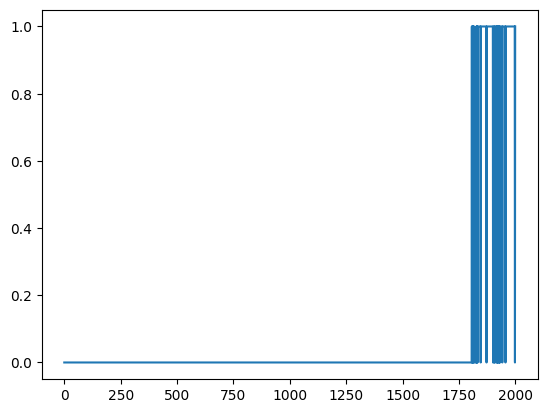

In [8]:
for k, base_dir in enumerate(selected_folderPaths):
    with open(f'{base_dir}/bm_object_free_run_debug.pkl', 'rb') as inp:
        free_run_debug = pickle.load(inp)

    with open(f'{base_dir}/bm_object_clamped_run_debug.pkl', 'rb') as inp:
        clamped_run_debug = pickle.load(inp)

    with open(f'{base_dir}/bm_object_learning_debug.pkl', 'rb') as inp:
        learning_debug = pickle.load(inp)

    total_num_files = len([fname for fname in os.listdir(base_dir) 
                            if 'bm_object_free_run_debug' in fname])
    files_to_load = total_num_files-1 

    for i in range(files_to_load):
        with open(f'{base_dir}/bm_object_free_run_debug_{i+1}.pkl', 'rb') as inp:
            free_run_debug.extend(pickle.load(inp)) 

        with open(f'{base_dir}/bm_object_clamped_run_debug_{i+1}.pkl', 'rb') as inp:
            clamped_run_debug.extend(pickle.load(inp))

        with open(f'{base_dir}/bm_object_learning_debug_{i+1}.pkl', 'rb') as inp:
            learning_debug.extend(pickle.load(inp))


    bm = BoltzmannMachine(env_states, num_hnodes, weight_mask)
    bm.free_run_debug = free_run_debug
    bm.clamped_run_debug = clamped_run_debug
    bm.learning_debug = learning_debug

    free_run_scores = get_free_run_scores(bm)

    W = bm.learning_debug[-1]['W']
    print(f'#{k} ', len(bm.free_run_debug), W.min(), W.max(), free_run_scores.any())

    plt.plot(free_run_scores)
    plt.show()

